In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import numpy as np

In [ ]:
df = pd.read_csv("ifood_df.csv")

In [ ]:
# ---  Data Collection & Import ---

print("✅ Dataset loaded successfully!\n")
print("Shape of dataset:", df.shape)
print("\nColumns:\n", list(df.columns))
print("\nPreview of data:\n", df.head())

✅ Dataset loaded successfully!

Shape of dataset: (2205, 39)

Columns:
 ['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married', 'marital_Single', 'marital_Together', 'marital_Widow', 'education_2n Cycle', 'education_Basic', 'education_Graduation', 'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds', 'AcceptedCmpOverall']

Preview of data:
     Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
0  58138.0        0         0       58       635         88              546   
1  46344.0        1         1       38        11          1                6   
2  71613.0   

In [ ]:
# --- Data Exploration & Cleaning ---

print("🔍 Missing Values:\n", df.isnull().sum().sum())
print("\nDuplicate Rows:", df.duplicated().sum())

🔍 Missing Values:
 0

Duplicate Rows: 184


In [ ]:
print("\nData Type Counts:\n", df.dtypes.value_counts())


Data Type Counts:
 int64      38
float64     1
Name: count, dtype: int64


In [ ]:
print("\nSummary Statistics:\n", df.describe().T.head(10))


Summary Statistics:
                    count          mean           std     min      25%  \
Income            2205.0  51622.094785  20713.063826  1730.0  35196.0   
Kidhome           2205.0      0.442177      0.537132     0.0      0.0   
Teenhome          2205.0      0.506576      0.544380     0.0      0.0   
Recency           2205.0     49.009070     28.932111     0.0     24.0   
MntWines          2205.0    306.164626    337.493839     0.0     24.0   
MntFruits         2205.0     26.403175     39.784484     0.0      2.0   
MntMeatProducts   2205.0    165.312018    217.784507     0.0     16.0   
MntFishProducts   2205.0     37.756463     54.824635     0.0      3.0   
MntSweetProducts  2205.0     27.128345     41.130468     0.0      1.0   
MntGoldProds      2205.0     44.057143     51.736211     0.0      9.0   

                      50%      75%       max  
Income            51287.0  68281.0  113734.0  
Kidhome               0.0      1.0       2.0  
Teenhome              0.0      1.

In [ ]:
# ---  Data Cleaning and Scaling ---

df_cleaned = df.drop_duplicates().reset_index(drop=True)

In [ ]:
numeric_features = df_cleaned.select_dtypes(include=['int64', 'float64']).columns

In [ ]:
scaler = StandardScaler()
df_scaled = df_cleaned.copy()
df_scaled[numeric_features] = scaler.fit_transform(df_cleaned[numeric_features])

print("✅ Data cleaned and scaled successfully!")
print("Original shape:", df.shape)
print("After cleaning:", df_cleaned.shape)

✅ Data cleaned and scaled successfully!
Original shape: (2205, 39)
After cleaning: (2021, 39)


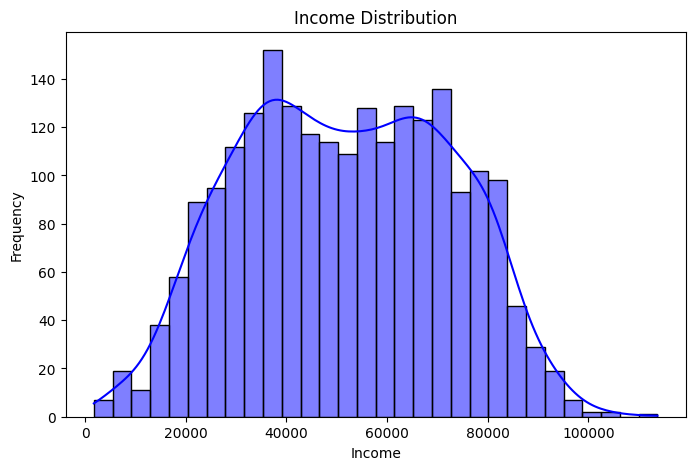

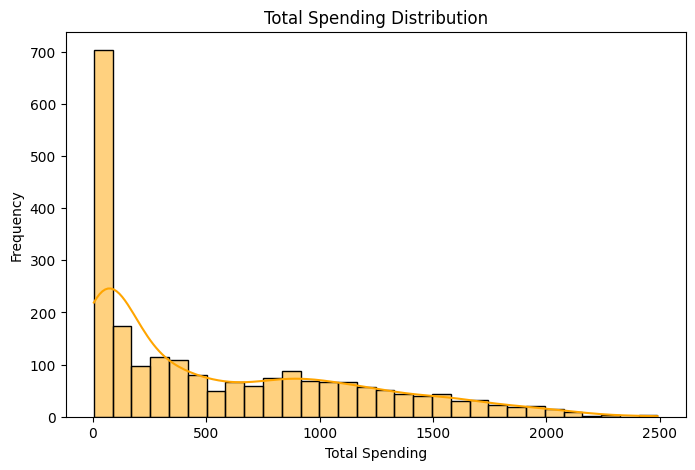

In [ ]:
# ---  Descriptive Statistics & Visualization ---


plt.figure(figsize=(8,5))
sns.histplot(df['Income'], bins=30, kde=True, color='blue')
plt.title("Income Distribution")
plt.xlabel("Income")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(df['MntTotal'], bins=30, kde=True, color='orange')
plt.title("Total Spending Distribution")
plt.xlabel("Total Spending")
plt.ylabel("Frequency")
plt.show()


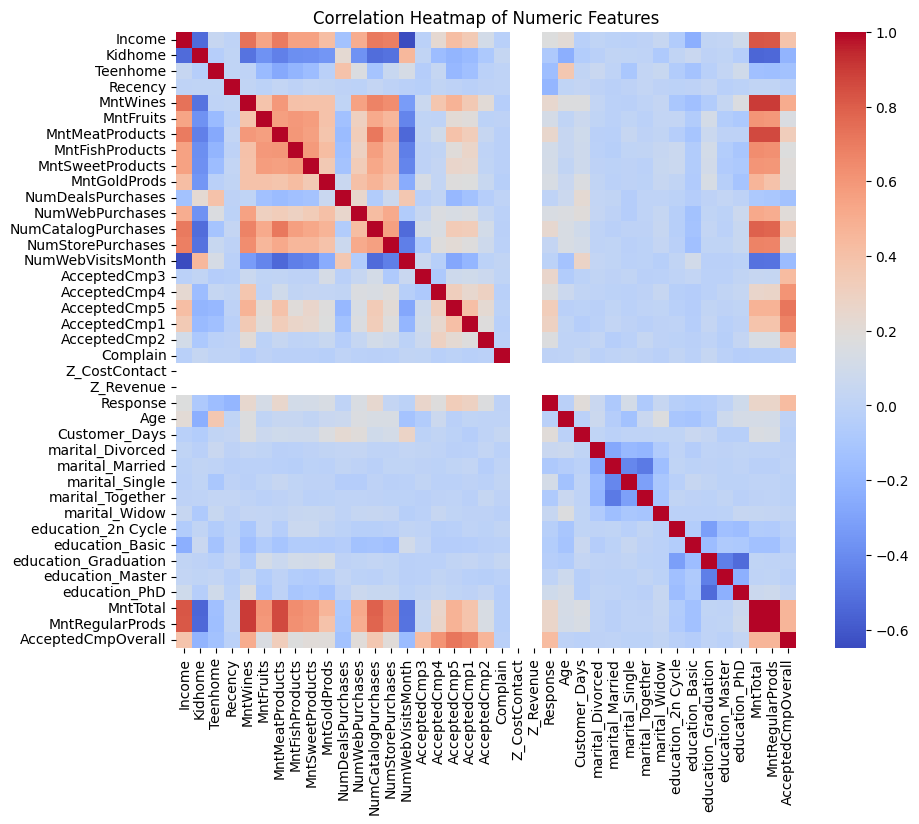

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

In [ ]:
# ---  Customer Segmentation (K-Means) ---
features = ['Income', 'Recency', 'MntWines', 'MntMeatProducts', 'MntTotal']
X = df_scaled[features]

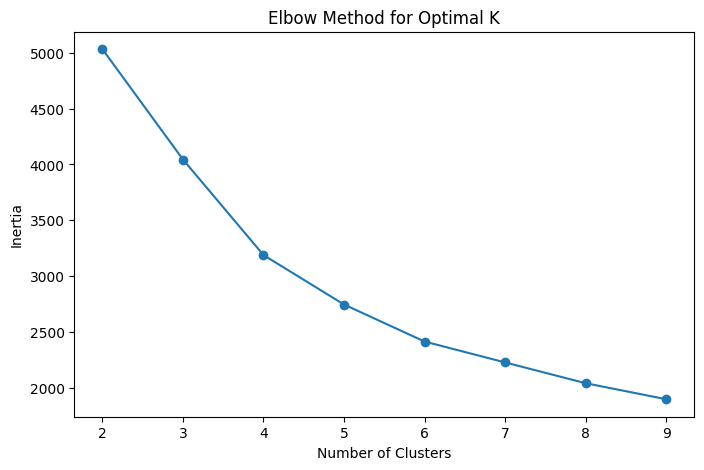

In [ ]:
inertia = []
K_range = range(2, 10)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    inertia.append(km.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

In [ ]:
# ---  Apply K-Means with Optimal K ---

kmeans = KMeans(n_clusters=4, random_state=42)
df_cleaned['Cluster'] = kmeans.fit_predict(X)

print("✅ K-Means clustering complete!")
print(df_cleaned['Cluster'].value_counts())
print("\nCluster Centers:\n", pd.DataFrame(kmeans.cluster_centers_, columns=features))

✅ K-Means clustering complete!
Cluster
0    591
3    569
2    565
1    296
Name: count, dtype: int64

Cluster Centers:
      Income   Recency  MntWines  MntMeatProducts  MntTotal
0 -0.674553  0.862661 -0.676272        -0.586722 -0.729937
1  1.290584  0.125278  1.401350         1.949220  1.797992
2  0.739142 -0.066445  0.650092         0.192518  0.560695
3 -0.707230 -0.896668 -0.674428        -0.597150 -0.736208


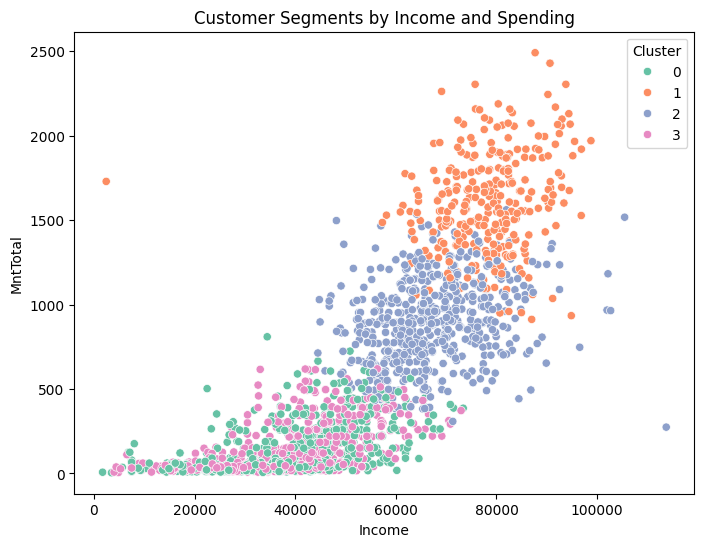

In [ ]:
# ---  Cluster Visualization --

plt.figure(figsize=(8,6))
sns.scatterplot(data=df_cleaned, x='Income', y='MntTotal', hue='Cluster', palette='Set2')
plt.title("Customer Segments by Income and Spending")
plt.show()

In [ ]:
cluster_summary = df_cleaned.groupby('Cluster')[['Income','MntTotal','Recency']].mean()
print("Cluster Summary:\n", cluster_summary)

Cluster Summary:
                Income     MntTotal    Recency
Cluster                                      
0        37718.673435   142.883249  73.849408
1        78412.574324  1600.570946  52.506757
2        67006.656637   887.961062  46.957522
3        37081.425308   139.731107  22.970123


In [ ]:
# ---  Insights & Recommendations ---

for cluster, data in cluster_summary.iterrows():
    print(f"\n🧠 Cluster {cluster}:")
    print(f"Avg Income: {data['Income']:.2f}, Avg Spending: {data['MntTotal']:.2f}, Avg Recency: {data['Recency']:.2f}")
    print("Recommendation: ")
    if data['MntTotal'] > cluster_summary['MntTotal'].mean():
        print("→ High-value customers — target with loyalty programs.\n")
    elif data['Income'] < cluster_summary['Income'].mean():
        print("→ Budget-conscious segment — promote discounts or bundles.\n")
    else:
        print("→ Moderate engagement — nurture through personalized offers.\n")


🧠 Cluster 0:
Avg Income: 37718.67, Avg Spending: 142.88, Avg Recency: 73.85
Recommendation: 
→ Budget-conscious segment — promote discounts or bundles.


🧠 Cluster 1:
Avg Income: 78412.57, Avg Spending: 1600.57, Avg Recency: 52.51
Recommendation: 
→ High-value customers — target with loyalty programs.


🧠 Cluster 2:
Avg Income: 67006.66, Avg Spending: 887.96, Avg Recency: 46.96
Recommendation: 
→ High-value customers — target with loyalty programs.


🧠 Cluster 3:
Avg Income: 37081.43, Avg Spending: 139.73, Avg Recency: 22.97
Recommendation: 
→ Budget-conscious segment — promote discounts or bundles.

